# Prutha Dolia
### Part 2

*Due: 9/27/19 11:59pm*


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Part 2 

This project is intended to give you experience with visualizing data sets. 

We will work (again) with the iris data set. https://archive.ics.uci.edu/ml/machine-learning-databases/iris/


In [25]:
cols = ['sepal_length','sepal_width','petal_length','petal_width','species']
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)

In [27]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Question 1 (10 pts)

Please generate a box-and-whisker plot using the built-in boxplot function in the pandas package (see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) showing the
distribution of the petal ratio for each of the three species.  Describe how you choose to handle outliers, and other useful features of your plot (e.g. mean, median, quantiles, ...) Be sure to add an appropriate title and axis labels.



In [35]:
petal_ratio = []
for val in range(0,dataset.count()[2]):
    petal_ratio.append(round((dataset.iloc[val][2]/dataset.iloc[val][3]),1)) # 1 for row wise append, 2 for column wise append

dataset['Petal ratio'] = petal_ratio

In [46]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Petal ratio,Sepal ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,7.0,1.5
1,4.9,3.0,1.4,0.2,Iris-setosa,7.0,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,6.5,1.5
3,4.6,3.1,1.5,0.2,Iris-setosa,7.5,1.5
4,5.0,3.6,1.4,0.2,Iris-setosa,7.0,1.4


<Figure size 720x720 with 0 Axes>

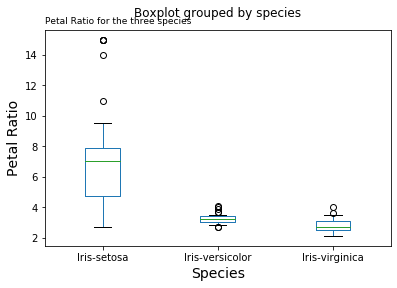

In [36]:
plt.figure(figsize=(10,10))
plot1 = dataset.boxplot(by='species', column=['Petal ratio'],grid=False,showfliers=True, whis=0.75)
plot1.set_title('Petal Ratio for the three species', fontsize=9, loc= 'left')
plot1.get_figure().gca().set_title("") 
plot1.set_xlabel('Species',fontsize=14) 
plot1.set_ylabel('Petal Ratio', fontsize=14) 
plt.show()

The box plot helps in displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. In a basic box plot the central rectangle spans the first quartile(lower part of the box i.e. 25th percentile value) to the third quartile(upper part of the box i.e. 75th percentile value) (the interquartile range or IQR). A segment inside the rectangle shows the median(50th percentile value) and "whiskers" above and below the box show the locations of the minimum and maximum(where ideally data should look like minimum and maximum, it is not from the actual data).

Any value >= Q3 + 1.5(Q3-Q1) or <= Q1 - 1.5(Q3-Q1) are possible outliers.

Any value >= Q3 + 3(Q3-Q1) or <= Q1 - 3(Q3-Q1) are most probable outliers.

To deal with outliers we can either floor the values or we can just remove the observation with extreme value.

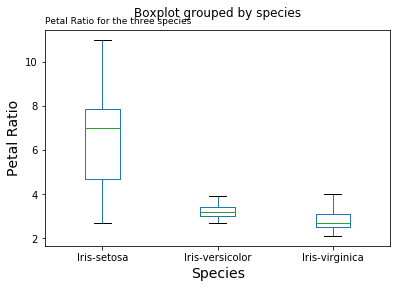

In [45]:
plot1 = dataset.boxplot(by='species', column=['Petal ratio'],grid=False, showfliers=False) 

plot1.set_title('Petal Ratio for the three species', fontsize=9, loc= 'left')
plot1.get_figure().gca().set_title("") 
plot1.set_xlabel('Species',fontsize=14)
plot1.set_ylabel('Petal Ratio', fontsize=14)

plt.show()

### Question 2 (10 pts) 

Create a similar plot and discussion for the sepal ratio, this time, using the boxplot function in the seaborn package, see https://seaborn.pydata.org/generated/seaborn.boxplot.html.  



In [40]:
sepal_ratio = []
for val in range(0,dataset.count()[0]):
    sepal_ratio.append(round((dataset.iloc[val][0]/dataset.iloc[val][1]),1))

dataset['Sepal ratio'] = sepal_ratio

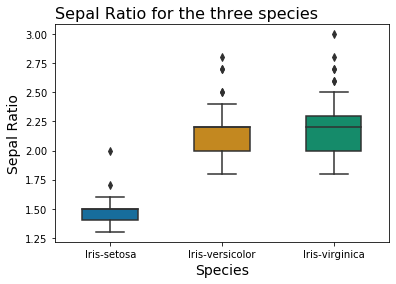

In [42]:
plot2 = sns.boxplot(y='Sepal ratio', x='species' , data=dataset, width=0.5, palette="colorblind", whis= 1) 
plot2.set_title('Sepal Ratio for the three species', fontsize=16, loc= 'left')
plot2.set_xlabel('Species',fontsize=14)
plot2.set_ylabel('Sepal Ratio', fontsize=14)
plt.show()

Here also we are displaying the boxplot but, from the seaborn package. We have explained everything related to boxplots earlier but while observing this boxplot we see that there are no median lines for setosa and versicolor so there comes a question as why this happened. This happens because of the skewness of the data, the median does not come in the middle of IQR. So we can say that the median depends on how each set of data is distributed so the differnece is due to the outliers.

Although Box and whisker plots handles large data effortlessly, but they do not retain the exact values and the details of the results of the distribution. These graphs only allow a clear summary of large amounts of data so that we can quickly view it and compare it with other data. So inorder to correct it we can add jitters or go for a violin plot.

### Question 3 (10 pts) 

Summarize what a "violin plot" is (https://seaborn.pydata.org/generated/seaborn.violinplot.html) and generate a violin plot using the seaborn package for the sepal ratio.  Discuss the pros and cons of the boxplot versus the violin plot.

Violin plot is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data. The thick black bar in the centre represents the interquartile range, the thin black line extended from it represents the 95% confidence intervals, and the white dot is the median.

As discussed earlier, box plots are limited in their display of the data, as their visual simplicity tends to hide significant details about how values in the data are distributed, violin plots on the other hand display more information, they can be noisier than a Box Plot.

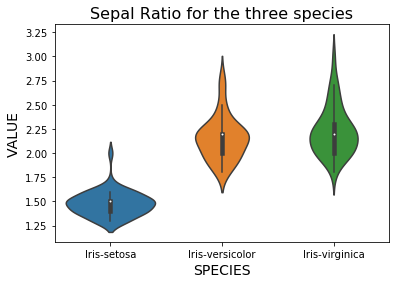

In [44]:
#Violin plot
plot3 = sns.violinplot(x="species", y="Sepal ratio", data=dataset) # plotting the violin plot

plot3.set_title('Sepal Ratio for the three species', fontsize=16) # setting the title
plot3.set_xlabel('SPECIES',fontsize=14) # setting x-axis label with fontsize 14
plot3.set_ylabel('VALUE', fontsize=14) # setting y-axis label with fontsize 14

plt.show() # displaying the plot


Boxplot vs Violin plot:

1) Box plots show outliers whereas violin plots don't.

2) While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.

So both the boxplot and violin plots have their own set of advantages and disadvantages